<a href="https://colab.research.google.com/github/Rebecca-ZYC/test1-defect-detection/blob/test1/defect_detection_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Train YOLOv8 Object Detection on NEU-DET Dataset

In [1]:
!nvidia-smi

Fri Jun 30 15:36:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8⚠️

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## 💻 CLI

In [12]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
2023-06-30 16:29:21.169942: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-30 16:29:22.532129: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<00:00, 104MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 76.1ms
Speed: 0.7ms pre-process, 76.1ms inference, 404.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


/content


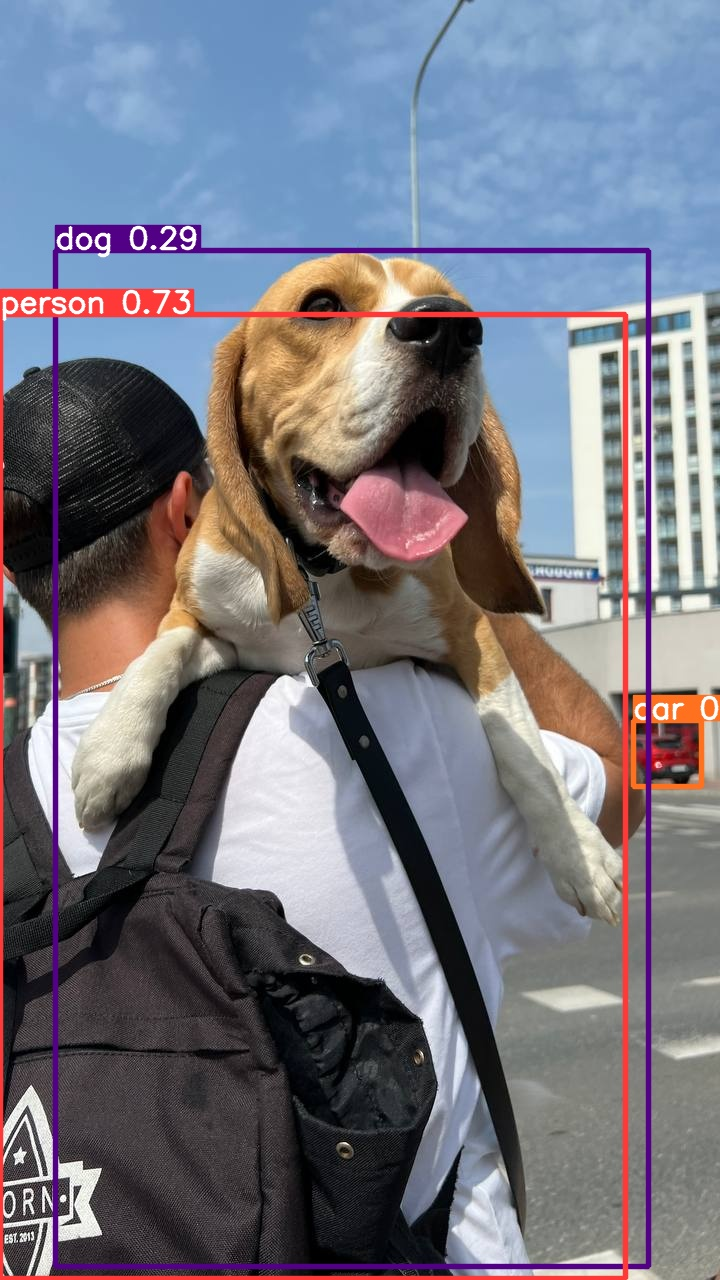

In [13]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

## 🐍 Python SDK

In [14]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


In [15]:
results[0].boxes.xyxy

tensor([[   0.,  314.,  625., 1278.],
        [  55.,  250.,  648., 1266.],
        [ 633.,  720.,  701.,  786.]], device='cuda:0')

## Download roboflow dataset

(ps: this dataset not include imgae pre processing, and data augmentation.)

In [18]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="X0SDJA9OSSEE3xLHkI8B")
project = rf.workspace("rebecca-zhu-oxvvk").project("steel-defect-detection-bpifm")
dataset = project.version(1).download("yolov8")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to steel-defect-detection-1 in yolov8:: 100%|██████████| 3808/3808 [00:01<00:00, 2455.67it/s]


## Train

In [27]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/steel-defect-detection-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False

In [31]:
!ls {HOME}/runs/detect/train7/

args.yaml					     train_batch2.jpg
confusion_matrix.png				     train_batch3320.jpg
events.out.tfevents.1688143939.0d4641489e89.20354.0  train_batch3321.jpg
F1_curve.png					     train_batch3322.jpg
P_curve.png					     val_batch0_labels.jpg
PR_curve.png					     val_batch0_pred.jpg
R_curve.png					     val_batch1_labels.jpg
results.csv					     val_batch1_pred.jpg
results.png					     val_batch2_labels.jpg
train_batch0.jpg				     val_batch2_pred.jpg
train_batch1.jpg				     weights


/content


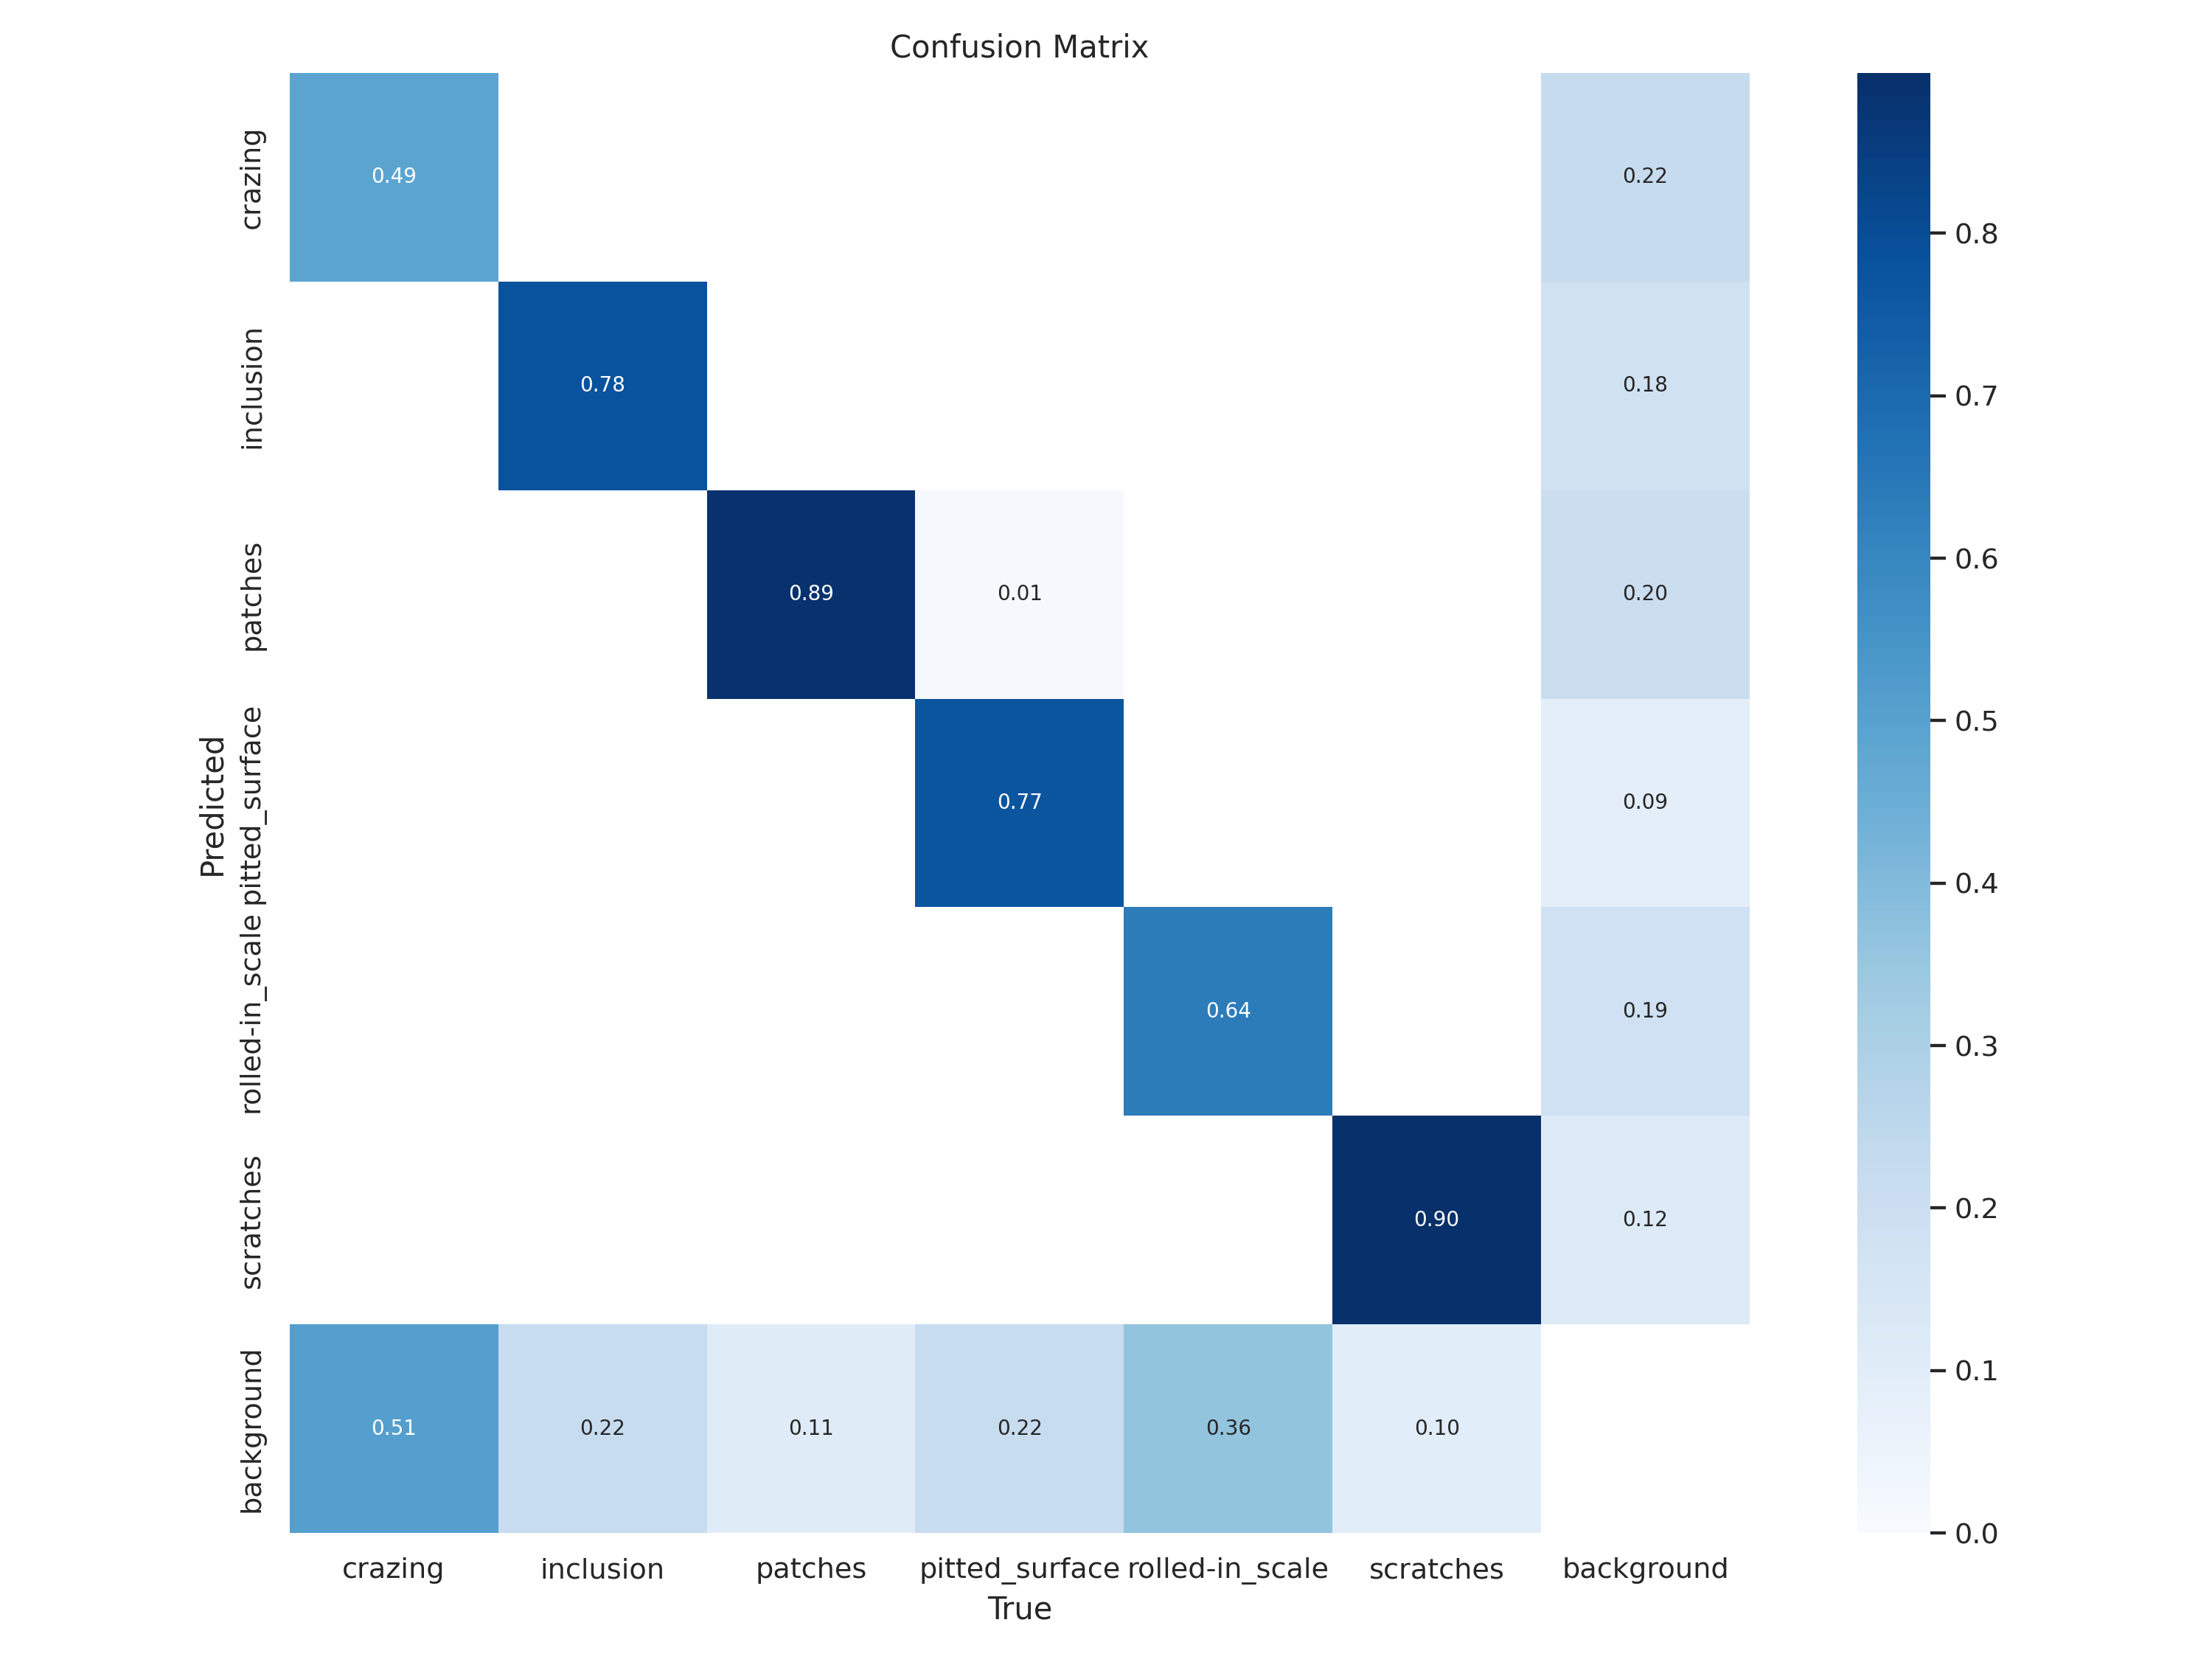

In [32]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train7/confusion_matrix.png', width=600)

/content


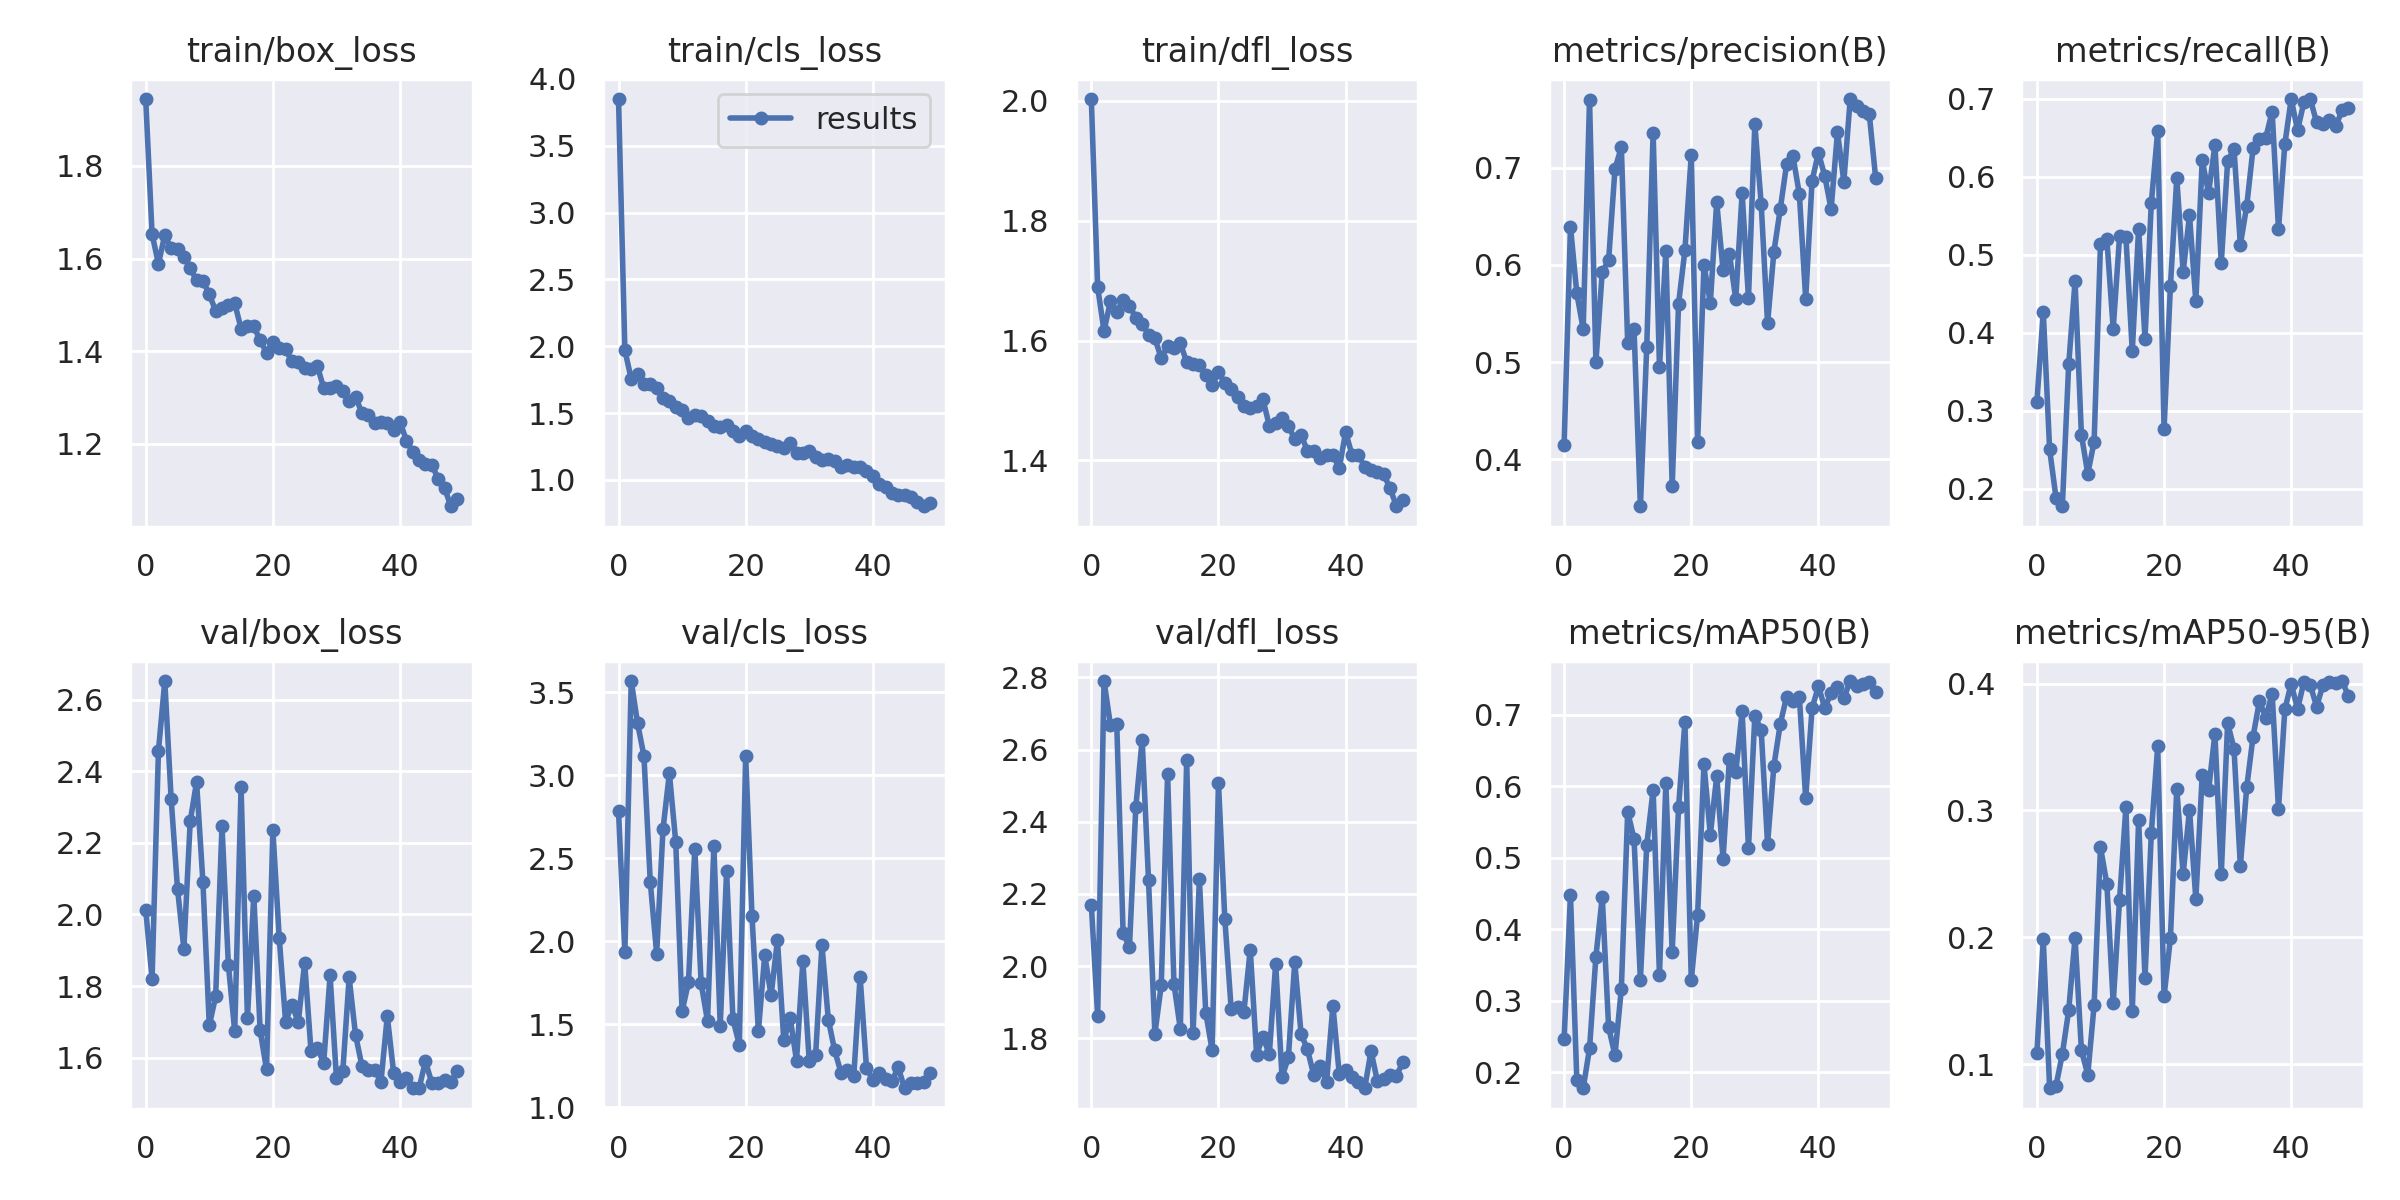

In [33]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train7/results.png', width=600)

/content


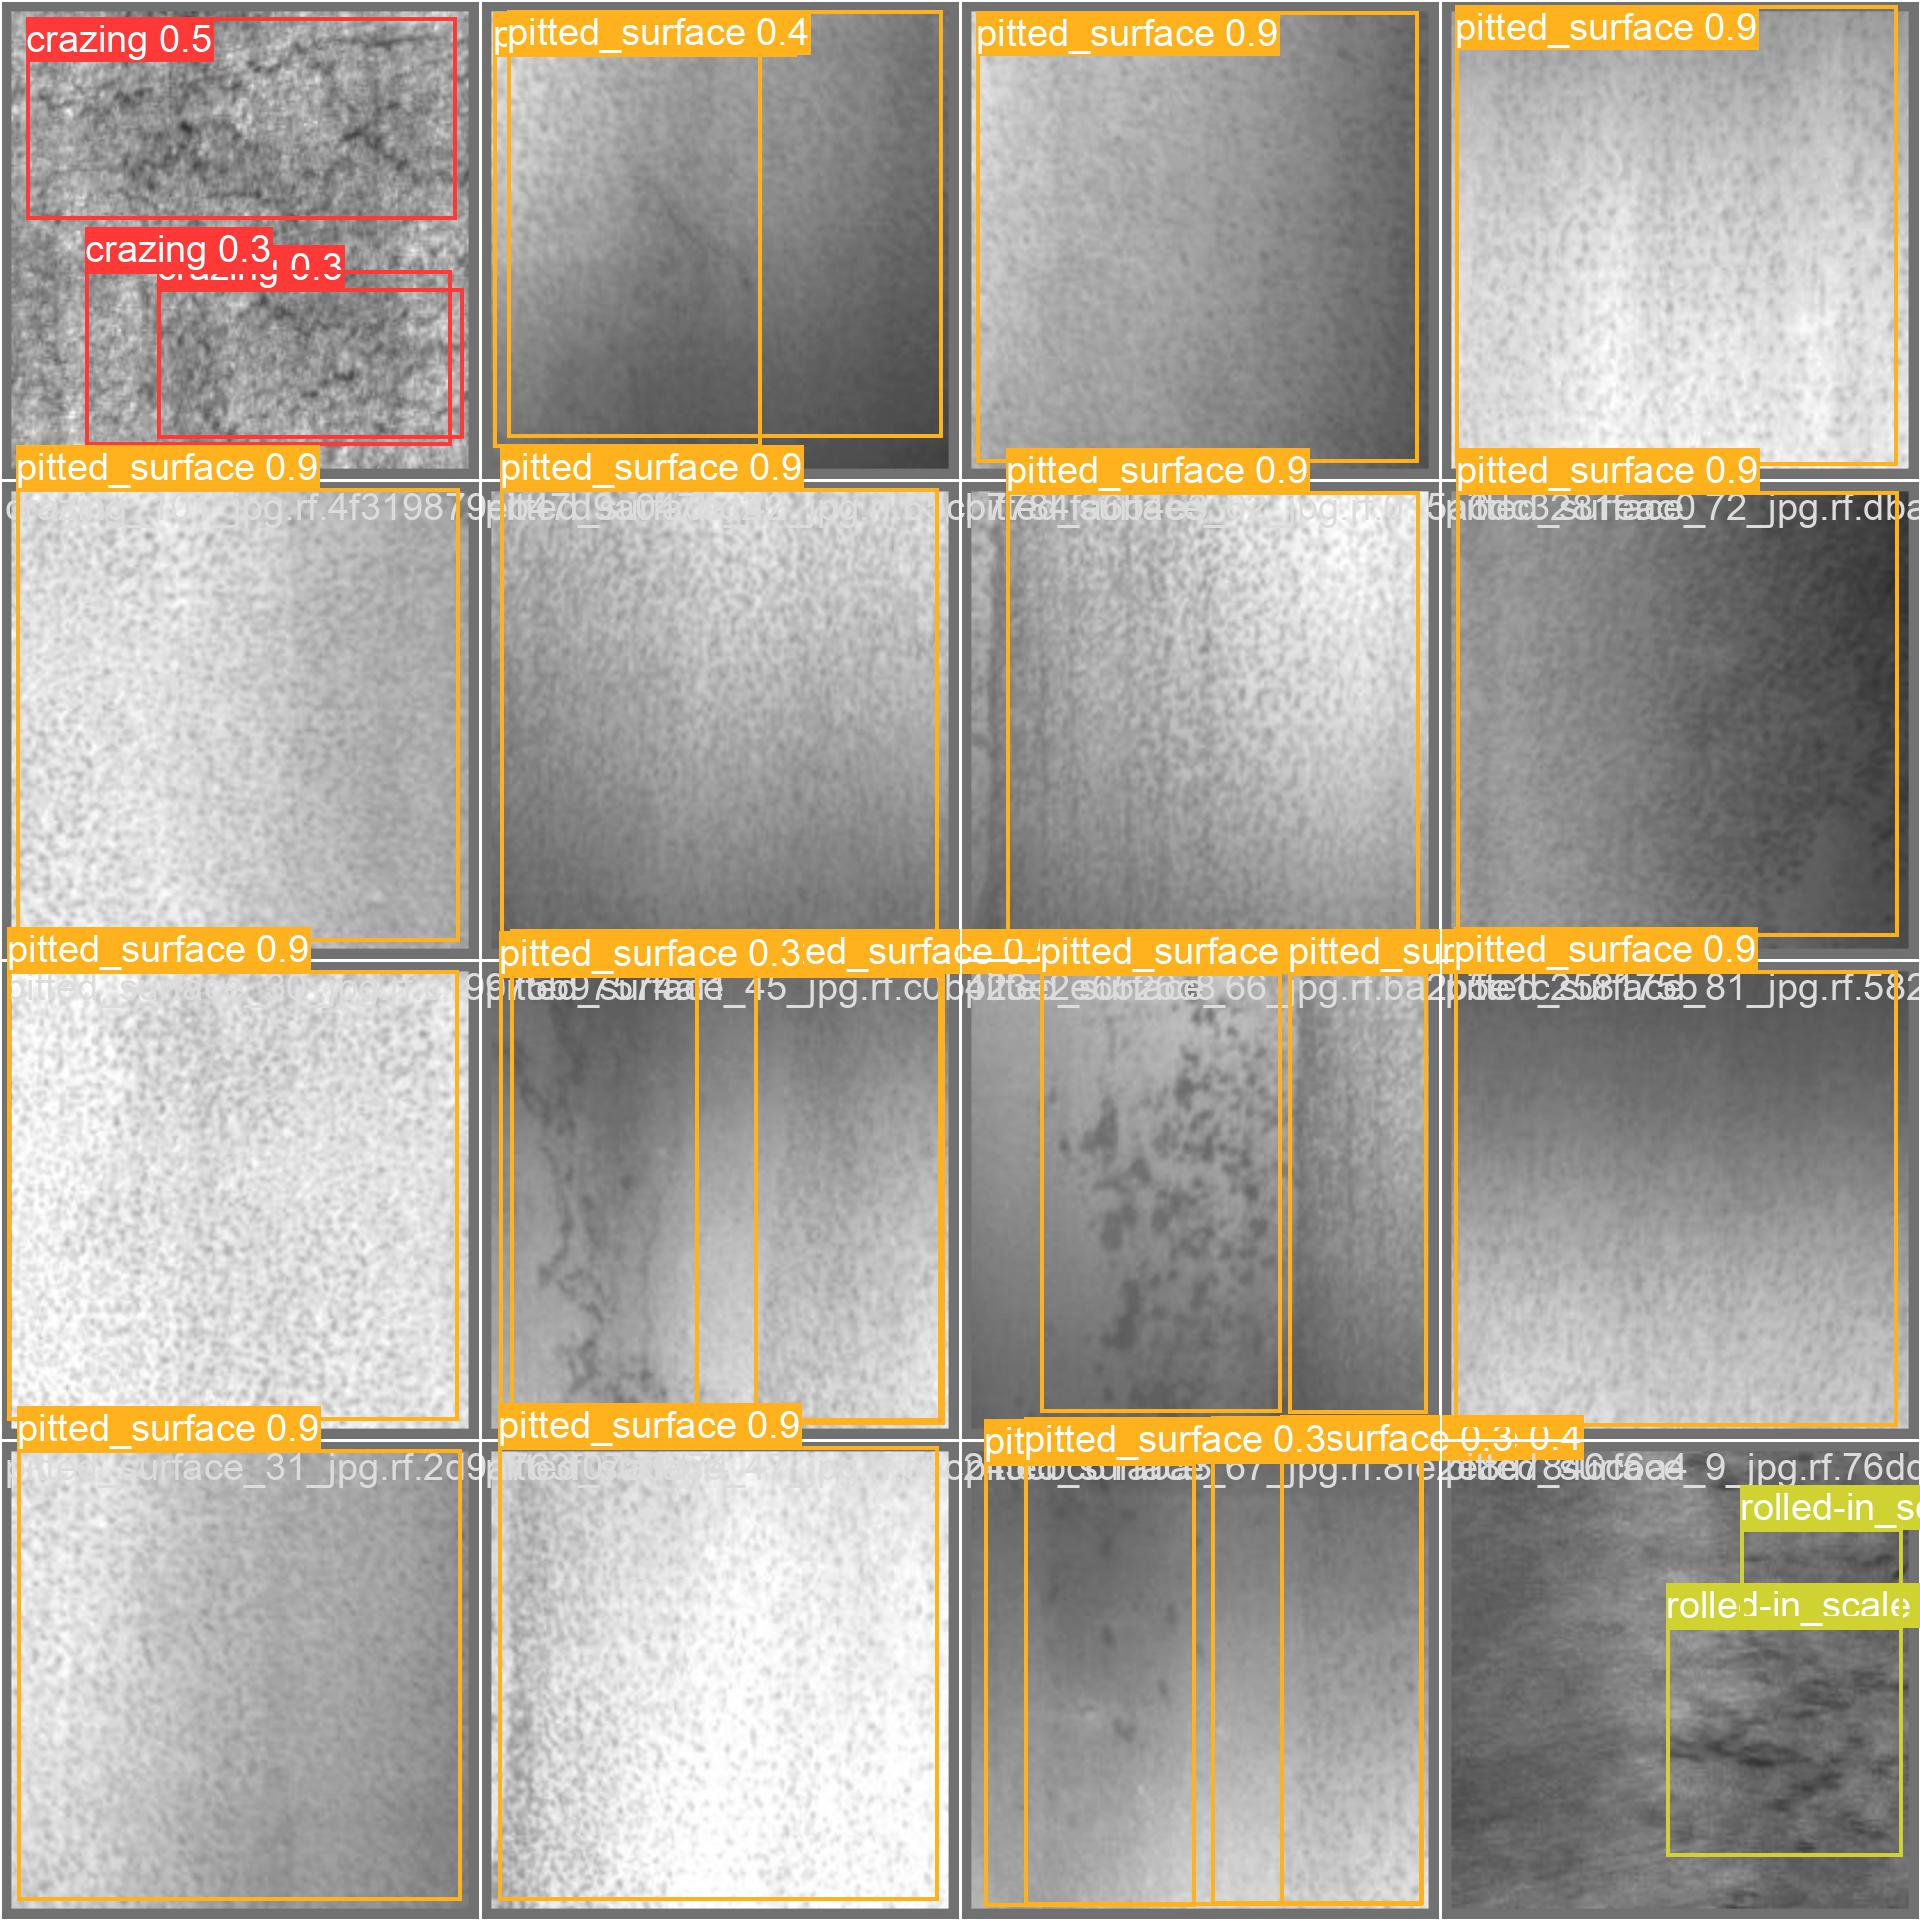

In [34]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train7/val_batch0_pred.jpg', width=600)

In [36]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train7/weights/best.pt data={dataset.location}/data.yaml

/content
2023-06-30 17:35:05.434832: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/steel-defect-detection-1/valid/labels.cache... 283 images, 0 backgrounds, 0 corrupt: 100% 283/283 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/datasets/steel-defect-detection-1/valid/images/crazing_120_jpg.rf.ce721ef0f57a1d4d8b537b0a565e73fe.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 18/18 [00:10<00:00,  1.78it/s]
                   all        283        672      0.755      0.687      0.746      0.403
               crazing        283         88      0.476      0.375      0.404      0.138
             inclusion        283        151      0.813      0.691      0.807      0.433
   

In [37]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train7/weights/best.pt conf=0.4 source={dataset.location}/test/images save=True

/content
2023-06-30 17:35:58.769532: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
image 1/289 /content/datasets/steel-defect-detection-1/test/images/crazing_107_jpg.rf.24deaeee059a1535d6c8cb3be706b2f0.jpg: 640x640 2 crazings, 16.3ms
image 2/289 /content/datasets/steel-defect-detection-1/test/images/crazing_108_jpg.rf.e8c487a32aa2aaae1609edf959ad06a6.jpg: 640x640 2 crazings, 16.4ms
image 3/289 /content/datasets/steel-defect-detection-1/test/images/crazing_112_jpg.rf.d17754235b36d430b007ae69c689fac1.jpg: 640x640 2 crazings, 16.3ms
image 4/289 /content/datasets/steel-defect-detection-1/test/images/crazing_122_jpg.rf.9fa7a1e1f9935f2c44da52b5a4d8f074.jpg: 640x640 1 crazing, 16.3ms
image 5/289 /content/datasets/steel-defect-detection-1/test/images/crazing_126_jpg.rf.203460d231

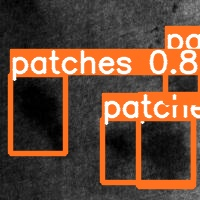

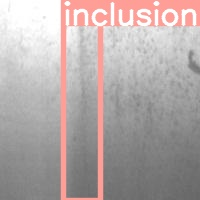

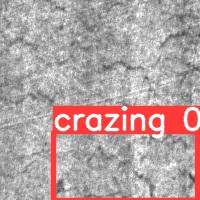

In [39]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=300))
      print("\n")

## Deploy model on Roboflow

https://app.roboflow.com/rebecca-zhu-oxvvk/steel-defect-detection-bpifm/deploy/1